In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
import matplotlib.pyplot as plt
from pylib.utils.functions_for_classification import mixed_2d_2cls, plot_scatter

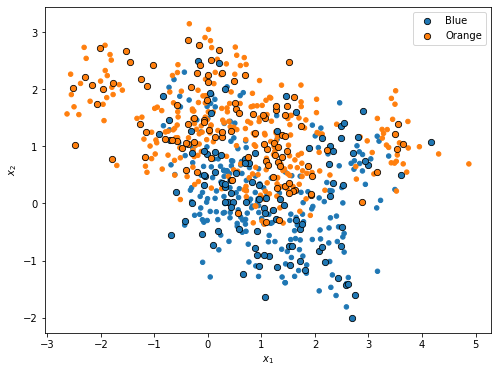

In [3]:
X_train, X_test, y_train, y_test = mixed_2d_2cls()
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, X_test, y_test)
plt.show()

## 二次方判别分析

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin
from pylib.utils.functions_for_classification import plot_decision_boundary
from scipy.stats import multivariate_normal
import numpy as np

In [5]:
class QuadraticDiscriminantAnalysis(BaseEstimator, ClassifierMixin):
    """二次方判别分析
    
    属性
    ----
    mu0_hat: 第一个特征的均值
    mu1_hat: 第二个特征的均值
    cov0_hat: 第一个特征的的协方差矩阵
    cov1_hat: 第二个特征的的协方差矩阵
    mvn0: 第一个特征之上的高斯分布
    mvn1: 第二个特征之上的高斯分布
    """
    def __init__(self):
        self.mu0_hat = None
        self.mu1_hat = None
        self.cov0_hat = None
        self.cov1_hat = None
        self.mvn0 = None
        self.mvn1 = None
    
    def fit(self, X, y=None):
        n = len(X)
        n0 = len(X[y == 0])
        n1 = len(X[y == 1])
        # the priors
        self.pi0 = n0 / n
        self.pi1 = n1 / n
        X0 = X[y == 0]
        X1 = X[y == 1]
        # 计算每一类的均值和协方差矩阵
        self.mu0_hat = np.mean(X0, axis=0)
        self.mu1_hat = np.mean(X1, axis=0)
        self.cov0_hat = (X0 - self.mu0_hat).T @ (X0 - self.mu0_hat) / (n0 - 1)
        self.cov1_hat = (X1 - self.mu1_hat).T @ (X1 - self.mu1_hat) / (n1 - 1)
        # 形成每一类的二元高斯分布
        self.mvn0 = multivariate_normal(self.mu0_hat, self.cov0_hat)
        self.mvn1 = multivariate_normal(self.mu1_hat, self.cov1_hat)
        
        return self
    
    def predict(self, X):
        p0 = self.mvn0.pdf(X)
        p1 = self.mvn1.pdf(X)
        p = np.c_[p0.ravel() * self.pi0, p1.ravel() * self.pi1]
        y_pred = p.argmax(axis=1)
        
        return y_pred

In [6]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [7]:
train_err = 1 - qda.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.285


In [8]:
test_err = 1 - qda.score(X_test, y_test)
print("测试样本误差：{:.3f}".format(test_err))

测试样本误差：0.252


In [9]:
# 每一类的均值中心
mu0 = qda.mu0_hat
mu1 = qda.mu1_hat
mu0, mu1

(array([1.1311358 , 0.20815891]), array([0.43820807, 1.30387382]))

In [10]:
# 类0的协方差矩阵
qda.cov0_hat

array([[ 1.2456279 , -0.22154736],
       [-0.22154736,  0.94636999]])

In [11]:
# 类1的协方差矩阵
qda.cov1_hat

array([[ 1.89631773, -0.49016477],
       [-0.49016477,  0.56507757]])

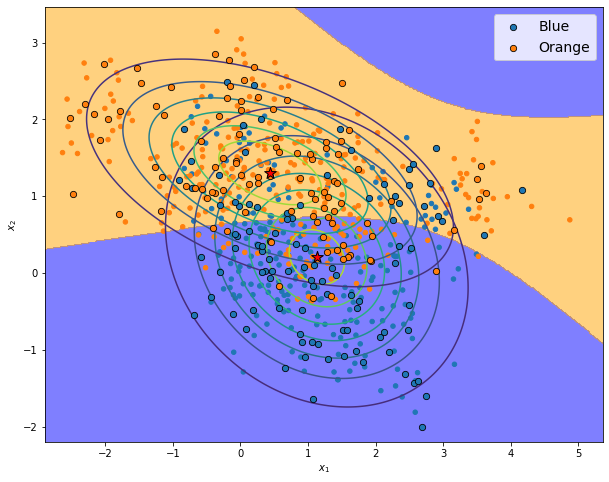

In [12]:
# 画出决策边界
x1n = np.linspace(X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1, 200)
x2n = np.linspace(X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1, 200)
xx1n, xx2n = np.meshgrid(x1n, x2n)
XX = np.c_[xx1n.ravel(), xx2n.ravel()]
pn0 = qda.mvn0.pdf(XX)
pn0 = pn0.reshape(xx1n.shape)
pn1 = qda.mvn1.pdf(XX)
pn1 = pn1.reshape(xx1n.shape)

plt.figure(figsize=(10, 8))
plt.scatter(mu0[0], mu0[1], marker='*', s=150, c='r', 
            linewidths=1, edgecolors='black', zorder=5)
plt.scatter(mu1[0], mu1[1], marker='*', s=150, c='r', 
            linewidths=1, edgecolors='black', zorder=5)
# 画出每一类的高斯分布
plt.contour(xx1n, xx2n, pn0)
plt.contour(xx1n, xx2n, pn1)
plot_decision_boundary(X_train, y_train, X_test, y_test, qda)
plt.show()

## 使用 `sklearn`

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
sk_qda = QuadraticDiscriminantAnalysis(store_covariance=True)
sk_qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

In [15]:
train_err = 1 - sk_qda.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.285


In [16]:
test_err = 1 - sk_qda.score(X_test, y_test)
print("测试样本误差：{:.3f}".format(test_err))

测试样本误差：0.252


In [17]:
# 每一类的均值中心
sk_qda.means_

array([[1.1311358 , 0.20815891],
       [0.43820807, 1.30387382]])

In [18]:
# 类0的协方差矩阵
sk_qda.covariance_[0]

array([[ 1.2456279 , -0.22154736],
       [-0.22154736,  0.94636999]])

In [19]:
# 类1的协方差矩阵
sk_qda.covariance_[1]

array([[ 1.89631773, -0.49016477],
       [-0.49016477,  0.56507757]])

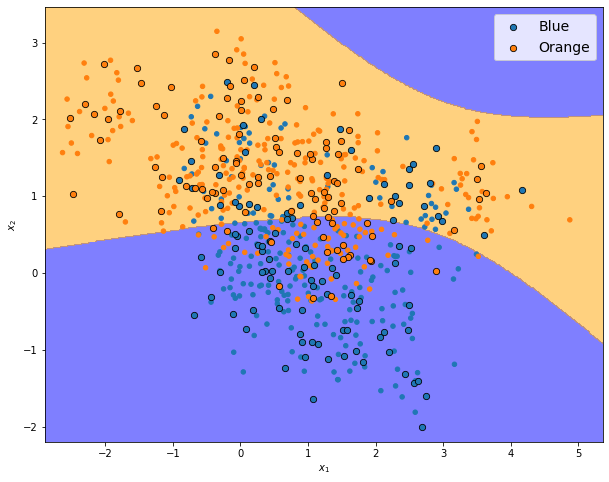

In [20]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, sk_qda)
plt.show()